<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    68.854520  58.707153  ...  190.762309   -0.404722
      1.0    57.329540  88.266135  ...  176.665883  -40.839132
      2.0    45.215694  22.043105  ...  175.674400   43.552418
      3.0    69.375325  71.150993  ...  169.774367  100.755979
      4.0    87.837297  47.725671  ...  202.818461  -69.143219
...                ...        ...  ...         ...         ...
999.0 245.0  22.462586  64.986534  ...  101.089723   94.746103
      246.0  65.758199  97.986011  ...  229.435928 -250.215331
      247.0  43.850566  82.988350  ...  184.823842  250.931859
      248.0  44.150395  26.941848  ...  148.372816   16.433277
      249.0  88.062161  23.980807  ...  182.526169 -116.648224

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    68.854520  58.707153  ...  190.762309   -0.404722
      1.0    57.329540  88.266135  ...  176.665883  -40.839132
      2.0    45.215694  22.043105  ...  175.674400   43.552418
      3.0    69.375325  71.150993  ...  169.774367  100.755979
      4.0    87.837297  47.725671  ...  202.818461  -69.143219
...                ...        ...  ...         ...         ...
999.0 245.0  22.462586  64.986534  ...  101.089723   94.746103
      246.0  65.758199  97.986011  ...  229.435928 -250.215331
      247.0  43.850566  82.988350  ...  184.823842  250.931859
      248.0  44.150395  26.941848  ...  148.372816   16.433277
      249.0  88.062161  23.980807  ...  182.526169 -116.648224

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    68.854520  58.707153  ...  190.762309   -0.404722
      1.0    57.329540  88.266135  ...  176.665883  -40.839132
      2.0    45.215694  22.043105  ...  175.674400   43.552418
      3.0    69.375325  71.150993  ...  169.774367  100.755979
      4.0    87.837297  47.725671  ...  202.818461  -69.143219
...                ...        ...  ...         ...         ...
999.0 245.0  22.462586  64.986534  ...  101.089723   94.746103
      246.0  65.758199  97.986011  ...  229.435928 -250.215331
      247.0  43.850566  82.988350  ...  184.823842  250.931859
      248.0  44.150395  26.941848  ...  148.372816   16.433277
      249.0  88.062161  23.980807  ...  182.526169 -116.648224

[250000 rows x 7 columns]

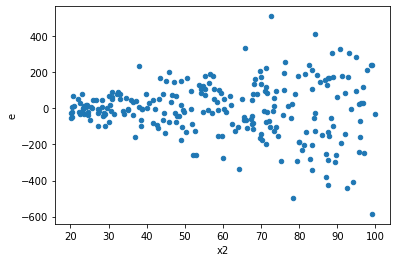

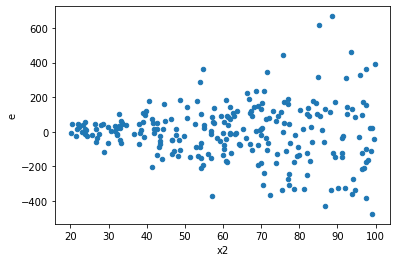

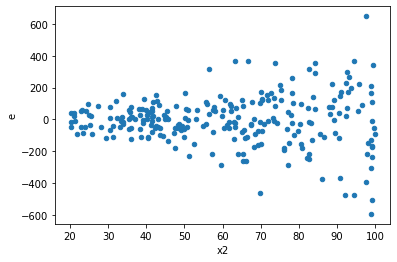

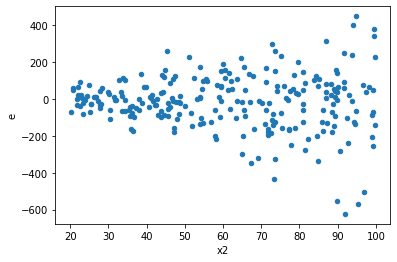

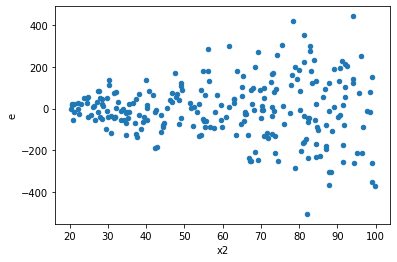

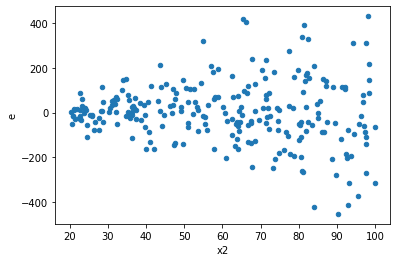

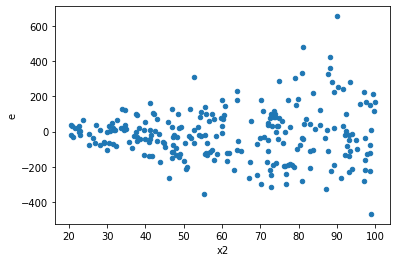

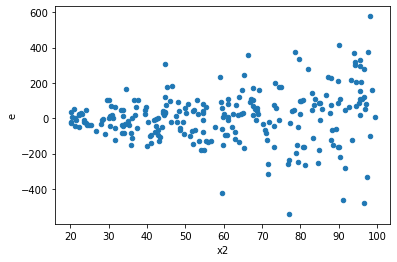

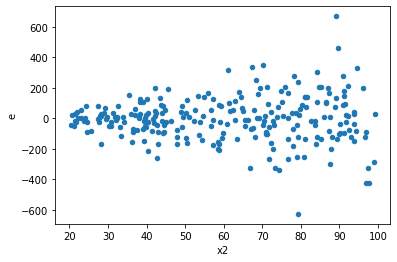

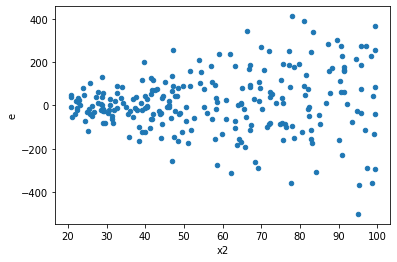

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,4365164.5011656275,532872.8877439749,45470.46355380862,5550.759247333072,8.19175567300193,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,4615798.483117107,863832.0087162348,48081.23419913653,8998.250090794112,5.343398295667204,5.551115123125783e-15,0.9999999999999972,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,4604210.590948552,474029.54911481915,47960.526989047416,4937.807803279366,9.712918951036368,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3964407.1593517354,608337.6354675873,41295.90790991391,6336.850369454034,6.516787599873824,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,3396388.86827606,461898.1198055121,35379.05071120896,4811.438747974084,7.353112564532957,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,3193184.4460483165,492039.5210739549,33262.33797966997,5125.411677853696,6.4896909888024465,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3812354.565416061,700479.826840245,39712.02672308397,7296.66486291922,5.442490160798771,2.886579864025407e-15,0.9999999999999986,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3711191.254494633,584744.9091102397,38658.24223431909,6091.092803231663,6.3466841637692255,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,3597305.707895269,653052.175385003,37471.93445724239,6802.626826927114,5.508450692740591,1.9984014443252818e-15,0.999999999999999,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4365164.5011656275,532872.8877439749,45470.46355380862,5550.759247333072,8.19175567300193,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,4615798.483117107,863832.0087162348,48081.23419913653,8998.250090794112,5.343398295667204,5.551115123125783e-15,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,4604210.590948552,474029.54911481915,47960.526989047416,4937.807803279366,9.712918951036368,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3964407.1593517354,608337.6354675873,41295.90790991391,6336.850369454034,6.516787599873824,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,3396388.86827606,461898.1198055121,35379.05071120896,4811.438747974084,7.353112564532957,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,3193184.4460483165,492039.5210739549,33262.33797966997,5125.411677853696,6.4896909888024465,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3812354.565416061,700479.826840245,39712.02672308397,7296.66486291922,5.442490160798771,2.886579864025407e-15,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3711191.254494633,584744.9091102397,38658.24223431909,6091.092803231663,6.3466841637692255,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,3597305.707895269,653052.175385003,37471.93445724239,6802.626826927114,5.508450692740591,1.9984014443252818e-15,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64